In [2]:
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import optimizers

In [3]:
import numpy as np
# Load augmented_images array
augmented_images = np.load('Augmented_images.npy')

# Load augmented_labels array
augmented_labels = np.load('Augmented_labels.npy')
X=augmented_images
y=augmented_labels

In [4]:
y= y.argmax(axis=1)

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x) 
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

opt = Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, shuffle=True, stratify=y_train_val, random_state=123)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, shuffle=True)

Epoch 1/10
60/60 [==============================] - 253s 4s/step - loss: 1.1208 - accuracy: 0.3589 - val_loss: 1.0928 - val_accuracy: 0.3917
Epoch 2/10
60/60 [==============================] - 248s 4s/step - loss: 1.1096 - accuracy: 0.3698 - val_loss: 1.0928 - val_accuracy: 0.3917
Epoch 3/10
60/60 [==============================] - 249s 4s/step - loss: 1.1094 - accuracy: 0.3557 - val_loss: 1.0916 - val_accuracy: 0.3917
Epoch 4/10
60/60 [==============================] - 248s 4s/step - loss: 1.1037 - accuracy: 0.3609 - val_loss: 1.0941 - val_accuracy: 0.3917
Epoch 5/10
13/60 [=====>........................] - ETA: 2:37 - loss: 1.1080 - accuracy: 0.3606

KeyboardInterrupt: 

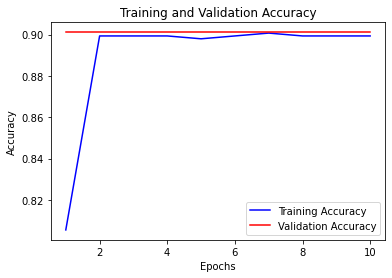

In [11]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:

test_loss, test_accuracy = model.evaluate(X_val,y_val)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 20s 3s/step - loss: 0.1750 - accuracy: 0.9011
Test Loss: 0.17501729726791382
Test Accuracy: 0.901098906993866


In [15]:
model.save('Spine_VGG19_with_aug.h5')

D:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
